# UN Data Exploration

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

4. read in GDP dataset

In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

Inspect first and last 10 rows

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
5,Afghanistan,2015,2068.265904,NaN
6,Afghanistan,2014,2102.384604,NaN
7,Afghanistan,2013,2116.465258,NaN
8,Afghanistan,2012,2075.491614,NaN
9,Afghanistan,2011,1904.559926,NaN


In [4]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7166,Zimbabwe,1999,2872.714795,NaN
7167,Zimbabwe,1998,2915.052992,NaN
7168,Zimbabwe,1997,2856.118188,NaN
7169,Zimbabwe,1996,2808.558556,NaN
7170,Zimbabwe,1995,2573.993785,NaN
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN
7175,Zimbabwe,1990,2652.129209,NaN


5. Drop 'Value Footnotes' column and rename others to the following: Country, Year, GDP_Per_Capita

In [5]:
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)
gdp_df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

In [6]:
gdp_df = gdp_df.rename(columns = {'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
gdp_df.columns

Index(['Country', 'Year', 'GDP_Per_Capita'], dtype='object')

6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7176 non-null   object 
 1   Year            7176 non-null   int64  
 2   GDP_Per_Capita  7176 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 168.3+ KB


There are 7176 rows and 3 columns. Country is an object column, Year is an integer column, and GDP_PER_Capita is a float column. At the moment, I can't think of any reason to change those types.

7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [27]:
gdp_df.groupby('Year')['Country'].count()

# not sure how I feel about this method
# come back and try it with pivot, I think that might be the way we're intended to solve this one

Year
1990    206
1991    207
1992    208
1993    209
1994    211
1995    222
1996    222
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    241
2020    240
Name: Country, dtype: int64

There is data from 1990 through to 2020. The number of observations generally increases over time.

8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [34]:
print(f'There are {gdp_df.Country.nunique()} countries in the GDP dataset.')
gdp_df['Country'].value_counts(ascending = True)


There are 242 countries in the GDP dataset.


Somalia                       8
Djibouti                      8
Turks and Caicos Islands     10
Sint Maarten (Dutch part)    10
Kosovo                       13
                             ..
Jordan                       31
Kazakhstan                   31
Kenya                        31
Malta                        31
Zimbabwe                     31
Name: Country, Length: 242, dtype: int64

Several of the countries with the least representation in the dataset experienced significant disruption during the time period contained in the data such as civil war and natural disasters like hurricanes which would logically make data collection difficult.

9. Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [14]:
gdp_2014 = gdp_df.loc[gdp_df['Year'] == 2014]
gdp_2014.head()

,Country,Year,GDP_Per_Capita
6,Afghanistan,2014,2102.384604
25,Africa Eastern and Southern,2014,3677.319414
56,Africa Western and Central,2014,4215.646000
87,Albania,2014,11586.833878
118,Algeria,2014,11512.690472


10. Use .describe() to find the summary statistics for GDP per capita in 2014.

In [17]:
gdp_2014['GDP_Per_Capita'].describe()

count       242.000000
mean      19612.875611
std       20961.714572
min         822.611195
25%        4702.212961
50%       12178.874687
75%       26461.384188
max      155201.740571
Name: GDP_Per_Capita, dtype: float64

11. Create a histogram of GDP Per Capita numbers for 2014 (you may want to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

<Axes: >

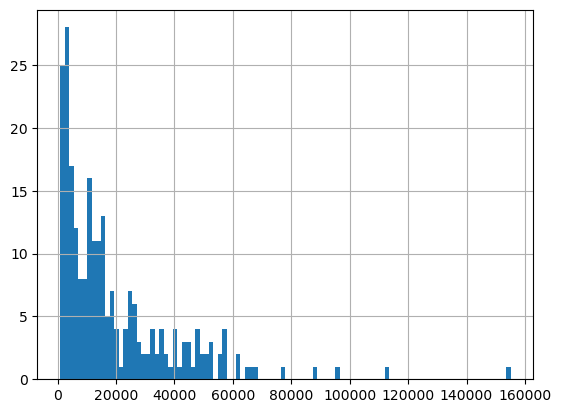

In [44]:
gdp_2014['GDP_Per_Capita'].hist(bins = 100)

The distribution is unimodal with a right skew. Most data points are clustered under 5000 or so with some extreme outliers at high values.

12. Find the top 5 countries and bottom 5 countries by GDP per capita in 2018.

In [46]:
gdp_2018 = gdp_df.loc[gdp_df['Year'] == 2018]
print(gdp_2018.sort_values('GDP_Per_Capita').head())
print(gdp_2018.sort_values('GDP_Per_Capita', ascending = False).head())

                       Country  Year  GDP_Per_Capita
916                    Burundi  2018      761.524143
1138  Central African Republic  2018      933.109951
1526           Dem. Rep. Congo  2018     1085.893688
5873                   Somalia  2018     1129.531464
4752                     Niger  2018     1200.402348
               Country  Year  GDP_Per_Capita
3915  Macao SAR, China  2018   132373.544079
3884        Luxembourg  2018   115049.926079
5722         Singapore  2018    98336.956494
5383             Qatar  2018    90970.060902
3073           Ireland  2018    83726.362961


13. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2018 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2018. Save the result to a dataframe named gdp_pivoted.

In [49]:
gdp_pivoted = gdp_df.loc[gdp_df['Year'].isin([1990, 2018])].pivot_table('GDP_Per_Capita', 
                                                                        index = 'Country', 
                                                                        columns = 'Year').dropna()
gdp_pivoted.head()


Year,1990,2018
Country,,
Africa Eastern and Southern,3083.976800,3697.317275
Africa Western and Central,2810.341129,4132.592996
Albania,4827.034551,13317.092313
Algeria,8746.340762,11630.679409
Angola,5758.950488,6982.129420
